### S13 T02: Bases de dades relacionals

In [ ]:
!apt-get update
!apt-get install mysql-server

In [ ]:
!pip3 install --upgrade mysql-connector

## Import dependencies

In [3]:
import mysql.connector
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table
from vega_datasets import data

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")
%matplotlib inline

## MySQL database 

In [4]:
!service mysql start

 * Starting MySQL database server mysqld
   ...done.


In [5]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root'"

ERROR 1045 (28000): Access denied for user 'root'@'localhost' (using password: NO)


## Create Connection to the MySQL server

In [6]:
db = mysql.connector.connect(
    host = "localhost",
    user = 'root',
    password = 'root')

## Create a connection cursor

In [7]:
mycursor = db.cursor()

## Create Database

In [8]:
mycursor.execute("DROP DATABASE IF EXISTS dfcountries")
mycursor.execute("CREATE DATABASE dfcountries")

## Show Database

In [9]:
mycursor.execute("SHOW DATABASES")
for x in mycursor:
  print(x)

('information_schema',)
('dfcountries',)
('mysql',)
('performance_schema',)
('sys',)


## Create Connection to the database

In [10]:
mydb = mysql.connector.connect(
      host = "localhost",
      user = 'root',
      password = 'root',
      database = 'dfcountries'
      )
mycursor = mydb.cursor()

## Create Tables

In [11]:
mycursor.execute("DROP TABLE IF EXISTS countries")
mycursor.execute("CREATE TABLE countries (\
					country_id INT AUTO_INCREMENT PRIMARY KEY,\
					country_code VARCHAR (55),\
          country_name VARCHAR(55),\
					region VARCHAR(40),\
					surface_area INT,\
					capital VARCHAR(55),\
					population INT)"
					)

In [12]:
mycursor.execute("DROP TABLE IF EXISTS currencies")
mycursor.execute("CREATE TABLE currencies (\
					curr_id INT AUTO_INCREMENT PRIMARY KEY,\
					code VARCHAR(55),\
					basic_unit VARCHAR(50),\
					curr_code VARCHAR(55))"
					)

In [13]:
mycursor.execute("DROP TABLE IF EXISTS economies")
mycursor.execute("CREATE TABLE economies (\
					econ_id INT AUTO_INCREMENT PRIMARY KEY,\
					code VARCHAR(55),\
					income_group VARCHAR(55),\
					gdp_percapita INT)"
					)

In [14]:
mycursor.execute("DROP TABLE IF EXISTS population")
mycursor.execute("CREATE TABLE population (\
					pop_id INT AUTO_INCREMENT PRIMARY KEY,\
					code VARCHAR(55),\
					pop_total INT,\
          pop_male INT,\
          pop_female INT)"
					)

In [15]:
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)

('countries',)
('currencies',)
('economies',)
('population',)


In [16]:
sql = "INSERT INTO countries (\
        country_id, country_code, country_name,\
        region, surface_area, capital,\
        population) VALUES (%s, %s, %s, %s, %s, %s, %s)"

values = [
	  ('1', 'AFG', 'Afganistan', 'Southern_and_Central_Asia', '652860', 'Kabul', '38928340'),
	  ('2', 'NDL', 'Nederlands' , 'Europe' , '41543', 'Amsterdam', '17441140'),
    ('3', 'ALB', 'Albanian', 'Europe', '28748', 'Tirana', '2837740'),
    ('4', 'ANG', 'Angola', 'Central Africa', '1246700', 'Luanda', '32866270'),
    ('5', 'AND','Andorra', 'Europe', '467','Andorra la Vella', '77543'),
    ('6', 'ARG', 'Argentina', 'South America', '2780400', 'Buenos Aires', '45376760'),
    ('7', 'ARM', 'Armenia', 'Middle East','29743', 'Yenevan', '2963230'),
    ('8', 'BOL', 'Bolivia', 'South America','1098581', 'Sucre', '11428245'),
    ('9', 'ESP', 'Spain', 'Europe','505944', 'Madrid', '47428245'),
    ('10', 'AUS', 'Australia', 'Oceania','7741220', 'Canberra', '25687040'),
    ('11', 'AZE', 'Azerbaiyan', 'Europe','86600', 'Baku', '10093120'),
    ('12', 'BRA', 'Brasil', 'South America','8515770 ', 'Brasilia', '212559410'),
    ('13', 'GER', 'Germany', 'Europe','357578', 'Berlin', '83240520'),
]
mycursor.executemany(sql, values)

query = "SELECT * FROM countries"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 'AFG', 'Afganistan', 'Southern_and_Central_Asia', 652860, 'Kabul', 38928340)
(2, 'NDL', 'Nederlands', 'Europe', 41543, 'Amsterdam', 17441140)
(3, 'ALB', 'Albanian', 'Europe', 28748, 'Tirana', 2837740)
(4, 'ANG', 'Angola', 'Central Africa', 1246700, 'Luanda', 32866270)
(5, 'AND', 'Andorra', 'Europe', 467, 'Andorra la Vella', 77543)
(6, 'ARG', 'Argentina', 'South America', 2780400, 'Buenos Aires', 45376760)
(7, 'ARM', 'Armenia', 'Middle East', 29743, 'Yenevan', 2963230)
(8, 'BOL', 'Bolivia', 'South America', 1098581, 'Sucre', 11428245)
(9, 'ESP', 'Spain', 'Europe', 505944, 'Madrid', 47428245)
(10, 'AUS', 'Australia', 'Oceania', 7741220, 'Canberra', 25687040)
(11, 'AZE', 'Azerbaiyan', 'Europe', 86600, 'Baku', 10093120)
(12, 'BRA', 'Brasil', 'South America', 8515770, 'Brasilia', 212559410)
(13, 'GER', 'Germany', 'Europe', 357578, 'Berlin', 83240520)


In [17]:
sql = "INSERT INTO currencies (curr_id, code, basic_unit, curr_code) VALUES (%s, %s, %s, %s)"

values = [
	  ('1', 'ESP', 'Euro', 'EUR'),
	  ('2', 'BOL', 'Boliviano' , 'BOL'),
    ('3', 'AZE', 'Manat', 'AZN'),
    ('4', 'AUS', 'Australian dollar', 'AUD'),
    ('5', 'ARM','Dram', 'AMD'),
    ('6', 'ARG', 'Argentine Peso', 'ARS'),
    ('7', 'ANG', 'Kwanza', 'AOA'),
    ('8', 'AND', 'Euro', 'EUR'),
    ('9', 'BRA', 'Real', 'BRL'),
    ('10', 'ALB', 'Lek', 'ALL'),
    ('11', 'NLD', 'Euro', 'EUR'),
    ('12', 'AFG', 'Afgani', 'AFN'),
]

mycursor.executemany(sql, values)

query = "SELECT * FROM currencies"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)


(1, 'ESP', 'Euro', 'EUR')
(2, 'BOL', 'Boliviano', 'BOL')
(3, 'AZE', 'Manat', 'AZN')
(4, 'AUS', 'Australian dollar', 'AUD')
(5, 'ARM', 'Dram', 'AMD')
(6, 'ARG', 'Argentine Peso', 'ARS')
(7, 'ANG', 'Kwanza', 'AOA')
(8, 'AND', 'Euro', 'EUR')
(9, 'BRA', 'Real', 'BRL')
(10, 'ALB', 'Lek', 'ALL')
(11, 'NLD', 'Euro', 'EUR')
(12, 'AFG', 'Afgani', 'AFN')


In [18]:
sql = "INSERT INTO economies (econ_id, code, income_group, gdp_percapita) VALUES (%s, %s, %s, %s)"

values = [
	  ('1', 'ESP', 'High_income', '45796'),
	  ('2', 'BOL', 'Lower_middle_income' , '13344'),
    ('3', 'AZE', 'Upper_middle_income', '17857'),
    ('4', 'AUS', 'High_income', '55492'),
    ('5', 'ARM','Lower_middle_income', '12592'),
    ('6', 'ARG', 'Upper_middle_income', '23862'),
    ('7', 'ANG', 'Upper_middle_income', '6881'),
    ('8', 'AND', 'High_income', '49153'),
    ('9', 'BRA', 'Upper_middle_income', '16764'),
    ('10', 'ALB', 'Upper_middle_income', '13344'),
    ('11', 'NLD', 'High_income', '45796'),
    ('12', 'AFG', 'low_income', '2474'),
]
mycursor.executemany(sql, values)

query = "SELECT * FROM economies"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)


(1, 'ESP', 'High_income', 45796)
(2, 'BOL', 'Lower_middle_income', 13344)
(3, 'AZE', 'Upper_middle_income', 17857)
(4, 'AUS', 'High_income', 55492)
(5, 'ARM', 'Lower_middle_income', 12592)
(6, 'ARG', 'Upper_middle_income', 23862)
(7, 'ANG', 'Upper_middle_income', 6881)
(8, 'AND', 'High_income', 49153)
(9, 'BRA', 'Upper_middle_income', 16764)
(10, 'ALB', 'Upper_middle_income', 13344)
(11, 'NLD', 'High_income', 45796)
(12, 'AFG', 'low_income', 2474)


In [19]:
sql = "INSERT INTO population (pop_id, code, pop_total, pop_male, pop_female) VALUES (%s, %s, %s, %s, %s)"

values = [
	  ('1', 'ESP', '473326140', '232272820', '241333010' ),
	  ('2', 'BOL', '116730290' , '58580190' ,'58150100'),
    ('3', 'AZE', '10093120', '5041660', '5051460'),
    ('4', 'AUS', '25687040', '12791830', '12895210'),
    ('5', 'ARM','2963230', '1393750', '1569490'),
    ('6', 'ARG', '45376760', '22137440', '23239320'),
    ('7', 'ANG', '32866270', '16260870', '16605400'),
    ('8', 'GER', '83240520', '41147290', '42093240 '),
    ('9', 'BRA', '212559410', '104435780', '108123630'),
    ('10', 'ALB', '2837740', '1444330', '1393420'),
    ('11', 'NLD', '17441140', '8689740', '8751400'),
    ('12', 'AFG', '38928340', '19976260', '18952080'),
]
mycursor.executemany(sql, values)

query = "SELECT * FROM population"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)


(1, 'ESP', 473326140, 232272820, 241333010)
(2, 'BOL', 116730290, 58580190, 58150100)
(3, 'AZE', 10093120, 5041660, 5051460)
(4, 'AUS', 25687040, 12791830, 12895210)
(5, 'ARM', 2963230, 1393750, 1569490)
(6, 'ARG', 45376760, 22137440, 23239320)
(7, 'ANG', 32866270, 16260870, 16605400)
(8, 'GER', 83240520, 41147290, 42093240)
(9, 'BRA', 212559410, 104435780, 108123630)
(10, 'ALB', 2837740, 1444330, 1393420)
(11, 'NLD', 17441140, 8689740, 8751400)
(12, 'AFG', 38928340, 19976260, 18952080)


## Nivell 2. Exercici 2
### Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

## Nivell 3. Exercici 3
### Genera algun gràfic que resumeixi les dades. 

In [20]:
#Selecting countries that have the same code name in both tables

query = """SELECT country_name, gdp_percapita
         FROM economies
         INNER JOIN countries
         ON country_code = code
         ORDER BY gdp_percapita DESC
         """
gdp_countries = pd.read_sql(query, mydb)  

In [21]:
print(gdp_countries)

   country_name  gdp_percapita
0     Australia          55492
1       Andorra          49153
2         Spain          45796
3     Argentina          23862
4    Azerbaiyan          17857
5        Brasil          16764
6      Albanian          13344
7       Bolivia          13344
8       Armenia          12592
9        Angola           6881
10   Afganistan           2474


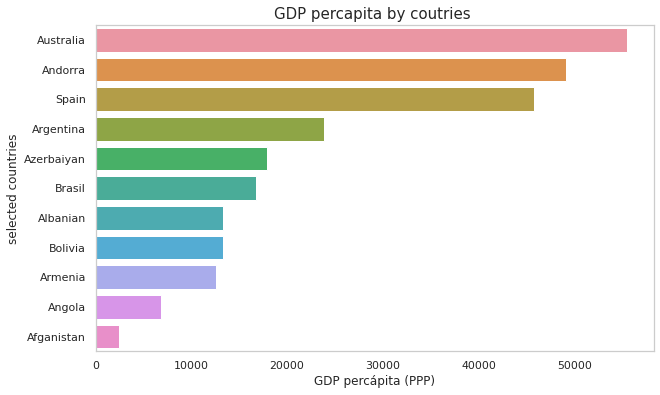

In [22]:
plt.figure(figsize =(10, 6))

ax = sns.barplot(data = gdp_countries, x="gdp_percapita", y= "country_name",orient="h")
ax.grid(False)
plt.title('GDP percapita by coutries ', fontsize = 15)
plt.xlabel('GDP percápita (PPP)',fontsize=12)
plt.ylabel('selected countries',fontsize=12)
plt.show()

In [23]:
# Selecting countries by name and economic classification

query = """SELECT economies.income_group, economies.gdp_percapita, countries.country_name 
    FROM economies 
    INNER JOIN countries 
    ON economies.code = countries.country_code
    """

In [24]:
eco_c = pd.read_sql(query, mydb)
print(eco_c)

           income_group  gdp_percapita country_name
0            low_income           2474   Afganistan
1   Upper_middle_income          13344     Albanian
2   Upper_middle_income           6881       Angola
3           High_income          49153      Andorra
4   Upper_middle_income          23862    Argentina
5   Lower_middle_income          12592      Armenia
6   Lower_middle_income          13344      Bolivia
7           High_income          45796        Spain
8           High_income          55492    Australia
9   Upper_middle_income          17857   Azerbaiyan
10  Upper_middle_income          16764       Brasil


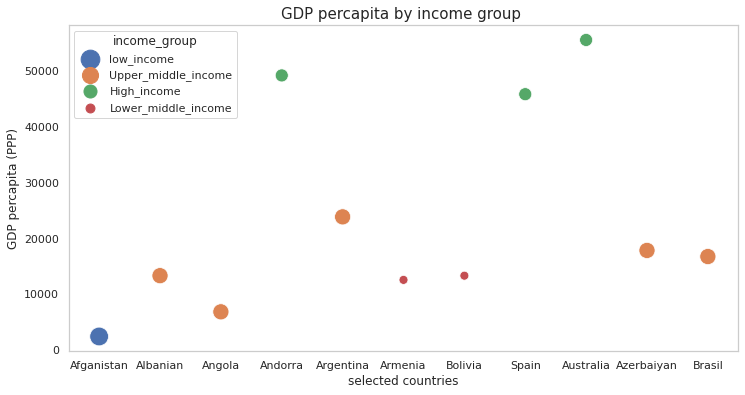

In [25]:
plt.figure(figsize =(12, 6))

ax = sns.scatterplot(data= eco_c, x = "country_name", y = "gdp_percapita", 
                     hue ='income_group', size = 'income_group',
                     sizes=(80, 350))
ax.grid(False)
plt.title('GDP percapita by income group ', fontsize = 15)
plt.xlabel('selected countries',fontsize=12)
plt.ylabel('GDP percapita (PPP)',fontsize=12)
plt.show()

In [26]:
#Visualizing the population by sex in table population.

query = """SELECT pop_id, code, pop_total, pop_male, pop_female
         FROM population 
         ORDER BY pop_total DESC
        """

dfpop = pd.read_sql(query, mydb)
print(dfpop)

    pop_id code  pop_total   pop_male  pop_female
0        1  ESP  473326140  232272820   241333010
1        9  BRA  212559410  104435780   108123630
2        2  BOL  116730290   58580190    58150100
3        8  GER   83240520   41147290    42093240
4        6  ARG   45376760   22137440    23239320
5       12  AFG   38928340   19976260    18952080
6        7  ANG   32866270   16260870    16605400
7        4  AUS   25687040   12791830    12895210
8       11  NLD   17441140    8689740     8751400
9        3  AZE   10093120    5041660     5051460
10       5  ARM    2963230    1393750     1569490
11      10  ALB    2837740    1444330     1393420


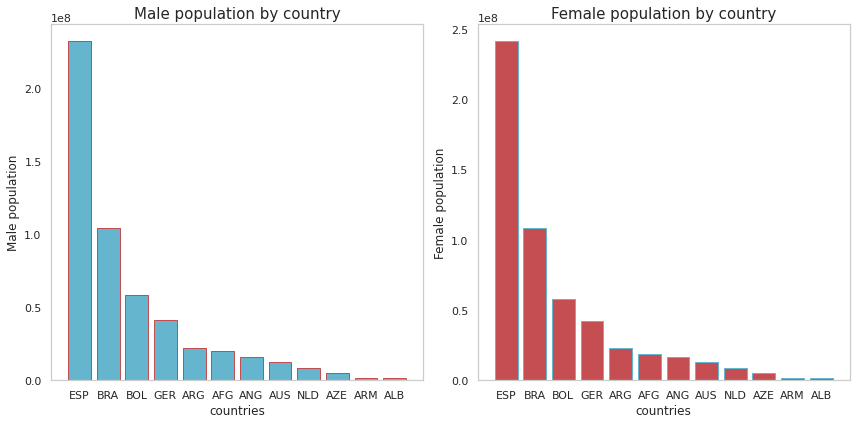

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

axes[0].bar(dfpop['code'], dfpop['pop_male'], color='c', edgecolor='r')
axes[0].set_xlabel("countries",fontsize=12)
axes[0].set_ylabel("Male population",fontsize=12)
axes[0].set_title("Male population by country",fontsize=15)
axes[0].grid(False)

axes[1].bar(dfpop['code'], dfpop['pop_female'], color='r', edgecolor='c')
axes[1].set_xlabel("countries",fontsize=12)
axes[1].set_ylabel("Female population",fontsize=12)
axes[1].set_title("Female population by country",fontsize=15)
axes[1].grid(False)

plt.tight_layout();

In [28]:
# Selecting countries by the surface area and income group

query = """ SELECT countries.country_name, countries.surface_area, income_group
            FROM countries
            INNER JOIN economies ON countries.country_code = economies.code
            ORDER BY surface_area DESC;

         """
eco_surface = pd.read_sql(query, mydb)

In [29]:
print(eco_surface)

   country_name  surface_area         income_group
0        Brasil       8515770  Upper_middle_income
1     Australia       7741220          High_income
2     Argentina       2780400  Upper_middle_income
3        Angola       1246700  Upper_middle_income
4       Bolivia       1098581  Lower_middle_income
5    Afganistan        652860           low_income
6         Spain        505944          High_income
7    Azerbaiyan         86600  Upper_middle_income
8       Armenia         29743  Lower_middle_income
9      Albanian         28748  Upper_middle_income
10      Andorra           467          High_income


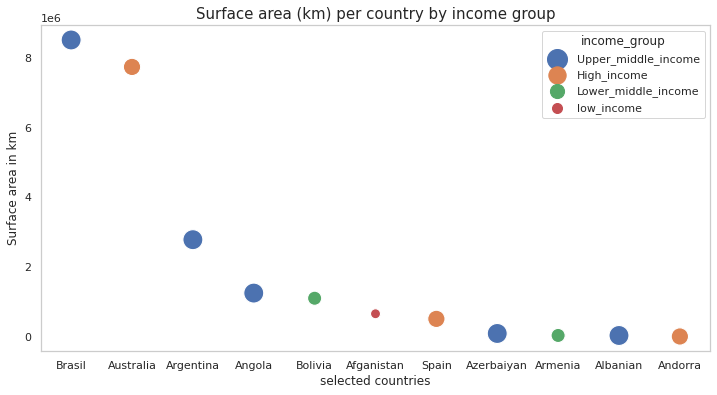

In [30]:
plt.figure(figsize =(12, 6))

ax = sns.scatterplot(data= eco_surface, x = "country_name", y = "surface_area", 
                     hue ='income_group', size = 'income_group',
                     sizes=(100, 400))
ax.grid(False)
plt.title('Surface area (km) per country by income group', fontsize = 15)
plt.xlabel('selected countries',fontsize=12)
plt.ylabel('Surface area in km',fontsize=12)
plt.show()

In [31]:

query = """SELECT countries.country_code, countries.country_name, countries.population, countries.surface_area,
                  economies.income_group, economies.gdp_percapita
           FROM countries
           INNER JOIN economies
           ON countries.country_code = economies.code
           ORDER BY countries.population DESC;
         """
totaldf = pd.read_sql(query, mydb)

In [34]:
totaldf  # Final Table

,country_code,country_name,population,surface_area,income_group,gdp_percapita
0,BRA,Brasil,212559410,8515770,Upper_middle_income,16764
1,ESP,Spain,47428245,505944,High_income,45796
2,ARG,Argentina,45376760,2780400,Upper_middle_income,23862
3,AFG,Afganistan,38928340,652860,low_income,2474
4,ANG,Angola,32866270,1246700,Upper_middle_income,6881
5,AUS,Australia,25687040,7741220,High_income,55492
6,BOL,Bolivia,11428245,1098581,Lower_middle_income,13344
7,AZE,Azerbaiyan,10093120,86600,Upper_middle_income,17857
8,ARM,Armenia,2963230,29743,Lower_middle_income,12592
9,ALB,Albanian,2837740,28748,Upper_middle_income,13344
